In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define loss functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def hinge(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred))

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

def huber(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    small_error_loss = 0.5 * error**2
    large_error_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, small_error_loss, large_error_loss).mean()

In [3]:
# Generate values for plotting
y_true = np.array([1, 0, 1, 1, 0])
y_pred_range = np.linspace(-3, 3, 400)



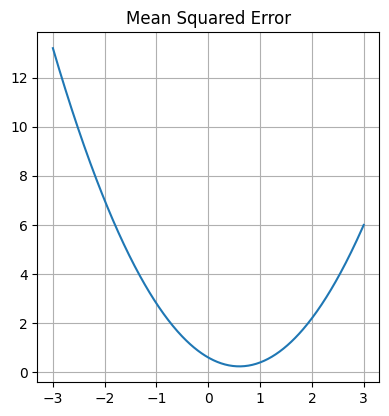

In [4]:
# Mean Squared Error
y_preds = y_pred_range
losses = [mse(y_true, y_pred) for y_pred in y_preds]
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.plot(y_preds, losses)
plt.title('Mean Squared Error')
plt.grid(True)


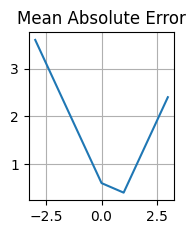

In [5]:
# Mean Absolute Error
losses = [mae(y_true, y_pred) for y_pred in y_preds]
plt.subplot(2, 3, 2)
plt.plot(y_preds, losses)
plt.title('Mean Absolute Error')
plt.grid(True)


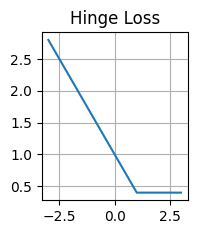

In [6]:
# Hinge Loss
losses = [hinge(y_true, y_pred) for y_pred in y_preds]
plt.subplot(2, 3, 3)
plt.plot(y_preds, losses)
plt.title('Hinge Loss')
plt.grid(True)

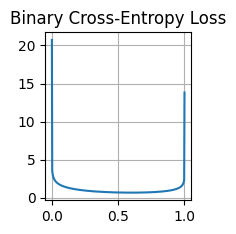

In [7]:
# Binary Cross-Entropy Loss
y_preds = np.linspace(0, 1, 400)
losses = [binary_cross_entropy(y_true, y_pred) for y_pred in y_preds]
plt.subplot(2, 3, 4)
plt.plot(y_preds, losses)
plt.title('Binary Cross-Entropy Loss')
plt.grid(True)

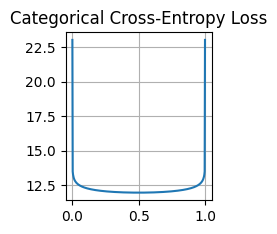

In [8]:
# Categorical Cross-Entropy Loss
# Dummy multi-class scenario
y_true_categorical = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_preds = np.linspace(0, 1, 400)
y_pred_categorical = np.array([[y_pred, 1-y_pred, 0] for y_pred in y_preds])
losses = [categorical_cross_entropy(y_true_categorical, y_pred) for y_pred in y_pred_categorical]
plt.subplot(2, 3, 5)
plt.plot(y_preds, losses)
plt.title('Categorical Cross-Entropy Loss')
plt.grid(True)

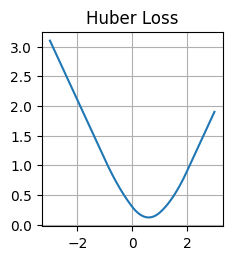

In [9]:
# Huber Loss
y_preds = y_pred_range
losses = [huber(y_true, y_pred) for y_pred in y_preds]
plt.subplot(2, 3, 6)
plt.plot(y_preds, losses)
plt.title('Huber Loss')
plt.grid(True)

plt.tight_layout()
plt.show()